🤖 Iniciando Bot de Trading Binario...
YF.download() has changed argument auto_adjust default to True

📊 RESULTADO DEL EXAMEN:
Precisión del Bot: 54.00%
(Significa: ¿Qué porcentaje de las veces adivinó correctamente la dirección?)


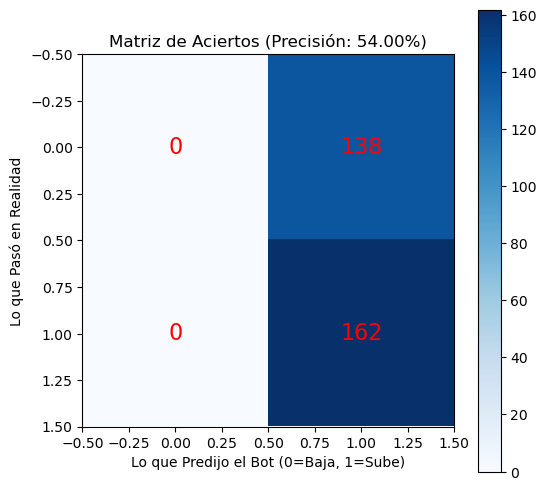


🔮 PREDICCIÓN PARA MAÑANA: El modelo cree que Apple va a SUBIR 🟢


/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

print("🤖 Iniciando Bot de Trading Binario...")

# 1. OBTENER DATOS
df = yf.download('AAPL', start='2020-01-01', progress=False)

# Limpieza de índices múltiples (si aplica)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
    
df = df[['Close']].copy()

# 2. INGENIERÍA DE DATOS (Crear las "Pistas")
# En lugar del día, usaremos el "Retorno Diario" (¿Cuánto ganó/perdió ayer?)
df['Retorno'] = df['Close'].pct_change()

# Creamos retardos (Lags): ¿Qué pasó hace 1 día? ¿Qué pasó hace 2 días?
# La hipótesis: Si bajó 2 días seguidos, quizás rebote (o no). La IA decidirá.
df['Lag_1'] = df['Retorno'].shift(1)
df['Lag_2'] = df['Retorno'].shift(2)

# 3. DEFINIR EL OBJETIVO (Target)
# Si mañana el precio sube, ponemos 1. Si baja, ponemos 0.
# shift(-1) mira hacia el futuro (mañana)
df['Target'] = np.where(df['Retorno'].shift(-1) > 0, 1, 0)

# Borramos los huecos vacíos (NaN)
df = df.dropna()

# 4. PREPARAR ENTRENAMIENTO
# Usamos Lag_1 y Lag_2 para predecir si mañana Sube (Target)
X = df[['Lag_1', 'Lag_2']]
y = df['Target']

# Separamos: Entrenamos con datos viejos, probamos con datos nuevos (último 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. ENTRENAR MODELO (Regresión Logística)
# Es ideal para preguntas de SÍ/NO (Binario)
bot = LogisticRegression()
bot.fit(X_train, y_train)

# 6. EVALUAR EL BOT
predicciones = bot.predict(X_test)
precision = accuracy_score(y_test, predicciones)

print(f"\n📊 RESULTADO DEL EXAMEN:")
print(f"Precisión del Bot: {precision:.2%}")
print("(Significa: ¿Qué porcentaje de las veces adivinó correctamente la dirección?)")

# 7. VISUALIZAR ACIERTOS VS ERRORES
# Matriz de Confusión simple
conf_matrix = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title(f'Matriz de Aciertos (Precisión: {precision:.2%})')
plt.xlabel('Lo que Predijo el Bot (0=Baja, 1=Sube)')
plt.ylabel('Lo que Pasó en Realidad')
plt.colorbar()

# Poner números en los cuadros
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red', fontsize=16)

plt.show()

# Probemos con el dato de HOY para predecir MAÑANA
ultimo_dia = df[['Lag_1', 'Lag_2']].iloc[-1].values.reshape(1, -1)
prediccion_manana = bot.predict(ultimo_dia)
direccion = "SUBIR 🟢" if prediccion_manana[0] == 1 else "BAJAR 🔴"

print(f"\n🔮 PREDICCIÓN PARA MAÑANA: El modelo cree que Apple va a {direccion}")

# Regresion Multivariable

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("🚀 Iniciando Sistema Multivariable (Apple + Contexto de Mercado)...")

# 1. DESCARGA DE DATOS (Dos activos a la vez)
# AAPL = Apple
# ^GSPC = S&P 500 (El índice del mercado)
tickers = ['AAPL', '^GSPC']
df = yf.download(tickers, start='2020-01-01', progress=False)

# Limpieza de índices múltiples (Tip de profesional)
if isinstance(df.columns, pd.MultiIndex):
    df = df['Close'] # Nos quedamos solo con los precios de cierre
else:
    df = df[['Close']]

# Renombramos para trabajar fácil
df.columns = ['Apple', 'SP500']
df = df.dropna()

# 2. INGENIERÍA DE VARIABLES (CREAR LA INTELIGENCIA)
# Calculamos retornos porcentuales (¿Subió o bajó en %?)
df['Retorno_Apple'] = df['Apple'].pct_change()
df['Retorno_SP500'] = df['SP500'].pct_change()

# CREAMOS LAS PISTAS (FEATURES):
# Pista 1: ¿Qué hizo Apple ayer? (Lag 1)
df['Apple_Ayer'] = df['Retorno_Apple'].shift(1)
# Pista 2: ¿Qué hizo el Mercado ayer? (Lag 1 del SP500)
df['Mercado_Ayer'] = df['Retorno_SP500'].shift(1)

# DEFINIMOS EL OBJETIVO (TARGET):
# 1 si Apple sube mañana, 0 si baja
df['Target'] = np.where(df['Retorno_Apple'].shift(-1) > 0, 1, 0)

df = df.dropna()

# 3. PREPARAR EL EXAMEN
# Ahora la IA estudia DOS cosas: Apple ayer y Mercado ayer
X = df[['Apple_Ayer', 'Mercado_Ayer']]
y = df['Target']

# Separar datos (Entrenar con el pasado, probar con el presente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. ENTRENAR MODELO
cerebro = LogisticRegression()
cerebro.fit(X_train, y_train)

# 5. EVALUAR
predicciones = cerebro.predict(X_test)
precision = accuracy_score(y_test, predicciones)

print(f"\n🧠 PRECISIÓN DEL MODELO FINAL: {precision:.2%}")
print("------------------------------------------------")

# VERIFICAR CÓMO PIENSA (Coeficientes)
# Si el número es positivo, significa que influye para que SUBA.
# Si es negativo, influye para que BAJE.
importancia_apple = cerebro.coef_[0][0]
importancia_mercado = cerebro.coef_[0][1]

print(f"⚖️ Peso de Apple (Inercia propia): {importancia_apple:.4f}")
print(f"⚖️ Peso del Mercado (S&P500):    {importancia_mercado:.4f}")

if abs(importancia_mercado) > abs(importancia_apple):
    print("👉 CONCLUSIÓN: A la IA le importa más el Mercado General que la propia Apple.")
else:
    print("👉 CONCLUSIÓN: Apple se mueve a su propio ritmo.")

print("------------------------------------------------")

# 6. PREDICCIÓN PARA MAÑANA
# Tomamos los datos de HOY para predecir MAÑANA
datos_hoy = df[['Apple_Ayer', 'Mercado_Ayer']].iloc[-1].values.reshape(1, -1)
prediccion_manana = cerebro.predict(datos_hoy)
probabilidad = cerebro.predict_proba(datos_hoy)[0] # Qué tan seguro está

direccion = "SUBIR 🟢" if prediccion_manana[0] == 1 else "BAJAR 🔴"
confianza = probabilidad[1] if prediccion_manana[0] == 1 else probabilidad[0]

print(f"\n🔮 ORÁCULO FINANCIERO:")
print(f"Para mañana, el sistema estima que Apple va a: {direccion}")
print(f"Nivel de Confianza de la IA: {confianza:.2%}")

🚀 Iniciando Sistema Multivariable (Apple + Contexto de Mercado)...

🧠 PRECISIÓN DEL MODELO FINAL: 54.00%
------------------------------------------------
⚖️ Peso de Apple (Inercia propia): -0.0736
⚖️ Peso del Mercado (S&P500):    0.2150
👉 CONCLUSIÓN: A la IA le importa más el Mercado General que la propia Apple.
------------------------------------------------

🔮 ORÁCULO FINANCIERO:
Para mañana, el sistema estima que Apple va a: SUBIR 🟢
Nivel de Confianza de la IA: 52.95%


/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
